In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('../data/page-blocks0.dat')

In [3]:
df.columns

Index(['Height', ' Lenght', ' Area', ' Eccen', ' P_black', ' P_and',
       ' Mean_tr', ' Blackpix', ' Blackand', ' Wb_trans', 'Outcome'],
      dtype='object')

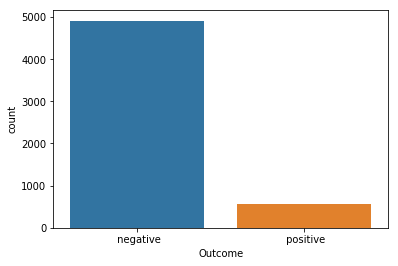

In [4]:
%matplotlib inline
sns.countplot(x='Outcome',data=df)

In [5]:
df_min=df[df['Outcome']==' positive']

In [6]:
df_majority=df[df['Outcome']==' negative']

In [7]:
df_min.to_csv('page-blocks0_minority.csv',index=False)
df_majority.to_csv('page-blocks0_majority.csv',index=False)

In [8]:
data=np.array(df.values)

pos=data.shape[1]-1

for i in range(data.shape[0]):
    if data[i][pos]==' negative':
        data[i][pos]=0
    else:
        data[i][pos]=1


min_data=np.array(df_min)
maj_data=np.array(df_majority)

In [9]:
validation=0.30
seed=11

In [10]:
data.shape

(5472, 11)

In [11]:
df_min.shape

(559, 11)

In [12]:
min_data.shape

(559, 11)

In [13]:
maj_data.shape

(4913, 11)

In [14]:
data[:1,:10]

array([[5, 7, 35.0, 1.4, 0.4, 0.657, 2.33, 14, 23, 6]], dtype=object)

In [15]:
X=data[:,:10].astype(float)# getting the feature values
Y=data[:,10]# getting prediction

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=validation,random_state=seed)

In [17]:
X_train.shape

(3830, 10)

In [18]:
Y_train=Y_train.reshape((Y_train.shape[0],1))

In [19]:
Y_train.shape

(3830, 1)

In [20]:
train_Data=np.concatenate((X_train,Y_train),axis=1)

In [21]:
train_Data[:10]

array([[10.0, 16.0, 160.0, 1.6, 0.33799999999999997, 0.888, 2.08, 54.0,
        142.0, 26.0, 0],
       [8.0, 8.0, 64.0, 1.0, 0.484, 1.0, 3.44, 31.0, 64.0, 9.0, 0],
       [10.0, 18.0, 180.0, 1.8, 0.5720000000000001, 0.867, 6.44, 103.0,
        156.0, 16.0, 0],
       [5.0, 18.0, 90.0, 3.6, 0.322, 1.0, 1.45, 29.0, 90.0, 20.0, 0],
       [9.0, 96.0, 864.0, 10.667, 0.281, 0.815, 1.96, 243.0, 704.0,
        124.0, 0],
       [10.0, 249.0, 2490.0, 24.9, 0.462, 0.8420000000000001, 3.53,
        1151.0, 2097.0, 326.0, 0],
       [9.0, 23.0, 207.0, 2.556, 0.304, 1.0, 1.62, 63.0, 207.0, 39.0, 0],
       [7.0, 36.0, 252.0, 5.143, 0.302, 0.873, 1.36, 76.0, 220.0, 56.0,
        0],
       [6.0, 17.0, 102.0, 2.833, 0.294, 0.863, 1.15, 30.0, 88.0, 26.0, 0],
       [10.0, 143.0, 1430.0, 14.3, 0.355, 0.775, 2.33, 508.0, 1108.0,
        218.0, 0]], dtype=object)

In [22]:
Y_test=Y_test.reshape((Y_test.shape[0],1))

In [23]:
test_Data=np.concatenate((X_test,Y_test),axis=1)

In [24]:
train_Data=DataFrame(train_Data)
test_Data=DataFrame(test_Data)

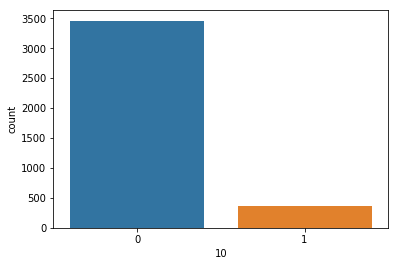

In [25]:
%matplotlib inline
sns.countplot(x=10,data=train_Data)

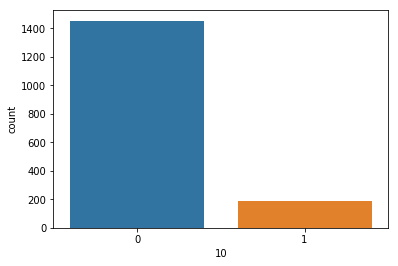

In [26]:
%matplotlib inline
sns.countplot(x=10,data=test_Data)

In [27]:
train_Data

,0,1,2,3,4,5,6,7,8,9,10
0,10,16,160,1.6,0.338,0.888,2.08,54,142,26,0
1,8,8,64,1,0.484,1,3.44,31,64,9,0
2,10,18,180,1.8,0.572,0.867,6.44,103,156,16,0
3,5,18,90,3.6,0.322,1,1.45,29,90,20,0
4,9,96,864,10.667,0.281,0.815,1.96,243,704,124,0
5,10,249,2490,24.9,0.462,0.842,3.53,1151,2097,326,0
6,9,23,207,2.556,0.304,1,1.62,63,207,39,0
7,7,36,252,5.143,0.302,0.873,1.36,76,220,56,0
8,6,17,102,2.833,0.294,0.863,1.15,30,88,26,0
9,10,143,1430,14.3,0.355,0.775,2.33,508,1108,218,0


In [28]:
train_Data.to_csv('train_Data.csv',index=False)
test_Data.to_csv('test_Data.csv',index=False)